### Loading the dataset

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [113]:
surgery = pd.read_csv("ThoraricSurgery.csv")

In [114]:
surgery.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [115]:
surgery.tail()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F
469,470,DGN3,4.72,3.56,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F


#### To remove warnings 

In [116]:
import warnings
warnings.filterwarnings('ignore')

### Descriptive statistics

In [117]:
surgery.describe()

,id,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


### Number of rows and columns

In [118]:
surgery.shape

(470, 18)

### Understanding the data set

#### Description of the features in the dataset.

In [119]:
description = pd.read_excel('Thoracic surgery-description.xlsx').dropna()
description.style.set_properties(subset=['Description'])

,Attributes,Description
0,DGN,"Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)"
1,PRE4,Forced Vital Capacity - FVC (numeric)
2,PRE5,Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
3,PRE6,"Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)"
4,PRE7,"Pain before surgery (T,F)"
5,PRE8,"Haemoptysis before surgery (T,F)"
6,PRE9,"Dyspnoea before surgery (T,F)"
7,PRE10,"Cough before surgery (T,F)"
8,PRE11,"Weakness before surgery (T,F)"
9,PRE14,"T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)"


### Renaming the attributes of the dataset

In [120]:
col = ['ID','Diagnosis','Forced_Capacity','Forced_Expiration','Zubrod_scale','Pain','Haemoptysis','Dyspnoea',
       'Cough','Weakness','Size_of_tumor','Diabetes','MI_6months','PAD','Smoker','Asthmatic','Age','Risk_1year']
surgery.columns = col

In [121]:
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


### Missing values

#### Checking the number of null values and data type of the variables present in the data set

In [122]:
surgery.isna().sum()

ID                   0
Diagnosis            0
Forced_Capacity      0
Forced_Expiration    0
Zubrod_scale         0
Pain                 0
Haemoptysis          0
Dyspnoea             0
Cough                0
Weakness             0
Size_of_tumor        0
Diabetes             0
MI_6months           0
PAD                  0
Smoker               0
Asthmatic            0
Age                  0
Risk_1year           0
dtype: int64

#### Calculating the number of missing vallues in each feature of the dataset

In [123]:
missing = surgery.isnull().sum()
missing_perc = (missing/len(surgery))*100
miss_val_table = pd.concat([missing, missing_perc], axis=1)
miss_val_table_rename_col = miss_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of MissingValues'})
miss_val_table_rename_col = miss_val_table_rename_col[miss_val_table_rename_col.iloc[:,1] != 0].sort_values('% of MissingValues', ascending=False).round(1)
print("Thoracic Surgery dataset has " + str(surgery.shape[1]) + " columns.\nThere are "+ str(miss_val_table_rename_col.shape[0]) + " columns that have missing values.")

Thoracic Surgery dataset has 18 columns.
There are 0 columns that have missing values.


#### Changing the values of the categorical variables, to improve the interpretation

In [124]:
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN1'] = 'Diagnosis_1'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN2'] = 'Diagnosis_2'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN3'] = 'Diagnosis_3'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN4'] = 'Diagnosis_4'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN5'] = 'Diagnosis_5'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN6'] = 'Diagnosis_6'
surgery['Diagnosis'][surgery['Diagnosis'] == 'DGN8'] = 'Diagnosis_8'

surgery['Zubrod_scale'][surgery['Zubrod_scale'] == 'PRZ0'] = 'Zubrod_scale_0'
surgery['Zubrod_scale'][surgery['Zubrod_scale'] == 'PRZ1'] = 'Zubrod_scale_1'
surgery['Zubrod_scale'][surgery['Zubrod_scale'] == 'PRZ2'] = 'Zubrod_scale_2'

surgery['Pain'][surgery['Pain'] == 'F'] = 'False'
surgery['Pain'][surgery['Pain'] == 'T'] = 'True'

surgery['Haemoptysis'][surgery['Haemoptysis'] == 'F'] = 'False'
surgery['Haemoptysis'][surgery['Haemoptysis'] == 'T'] = 'True'

surgery['Dyspnoea'][surgery['Dyspnoea'] == 'F'] = 'False'
surgery['Dyspnoea'][surgery['Dyspnoea'] == 'T'] = 'True'

surgery['Cough'][surgery['Cough'] == 'F'] = 'False'
surgery['Cough'][surgery['Cough'] == 'T'] = 'True'

surgery['Weakness'][surgery['Weakness'] == 'F'] = 'False'
surgery['Weakness'][surgery['Weakness'] == 'T'] = 'True'

surgery['Diabetes'][surgery['Diabetes'] == 'F'] = 'False'
surgery['Diabetes'][surgery['Diabetes'] == 'T'] = 'True'

surgery['MI_6months'][surgery['MI_6months'] == 'F'] = 'False'
surgery['MI_6months'][surgery['MI_6months'] == 'T'] = 'True'


surgery['PAD'][surgery['PAD'] == 'F'] = 'False'
surgery['PAD'][surgery['PAD'] == 'T'] = 'True'


surgery['Smoker'][surgery['Smoker'] == 'F'] = 'False'
surgery['Smoker'][surgery['Smoker'] == 'T'] = 'True'

surgery['Asthmatic'][surgery['Asthmatic'] == 'F'] = 'False'
surgery['Asthmatic'][surgery['Asthmatic'] == 'T'] = 'True'

surgery['Risk_1year'][surgery['Risk_1year'] == 'F'] = 'False'
surgery['Risk_1year'][surgery['Risk_1year'] == 'T'] = 'True'

In [125]:
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,Diagnosis_2,2.88,2.16,Zubrod_scale_1,False,False,False,True,True,OC14,False,False,False,True,False,60,False
1,2,Diagnosis_3,3.40,1.88,Zubrod_scale_0,False,False,False,False,False,OC12,False,False,False,True,False,51,False
2,3,Diagnosis_3,2.76,2.08,Zubrod_scale_1,False,False,False,True,False,OC11,False,False,False,True,False,59,False
3,4,Diagnosis_3,3.68,3.04,Zubrod_scale_0,False,False,False,False,False,OC11,False,False,False,False,False,54,False
4,5,Diagnosis_3,2.44,0.96,Zubrod_scale_2,False,True,False,True,True,OC11,False,False,False,True,False,73,True


### Displaying  data present in the csv file

In [126]:
surgery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 470 non-null    int64  
 1   Diagnosis          470 non-null    object 
 2   Forced_Capacity    470 non-null    float64
 3   Forced_Expiration  470 non-null    float64
 4   Zubrod_scale       470 non-null    object 
 5   Pain               470 non-null    object 
 6   Haemoptysis        470 non-null    object 
 7   Dyspnoea           470 non-null    object 
 8   Cough              470 non-null    object 
 9   Weakness           470 non-null    object 
 10  Size_of_tumor      470 non-null    object 
 11  Diabetes           470 non-null    object 
 12  MI_6months         470 non-null    object 
 13  PAD                470 non-null    object 
 14  Smoker             470 non-null    object 
 15  Asthmatic          470 non-null    object 
 16  Age                470 non

### Checking the data types

In [127]:
surgery.dtypes

ID                     int64
Diagnosis             object
Forced_Capacity      float64
Forced_Expiration    float64
Zubrod_scale          object
Pain                  object
Haemoptysis           object
Dyspnoea              object
Cough                 object
Weakness              object
Size_of_tumor         object
Diabetes              object
MI_6months            object
PAD                   object
Smoker                object
Asthmatic             object
Age                    int64
Risk_1year            object
dtype: object

### Finding number of unique values in each feature

In [128]:
surgery.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

ID     470
Age     45
dtype: int64

In [129]:
surgery.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

Forced_Capacity      134
Forced_Expiration    136
dtype: int64

In [130]:
surgery.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Diagnosis        7
Zubrod_scale     3
Pain             2
Haemoptysis      2
Dyspnoea         2
Cough            2
Weakness         2
Size_of_tumor    4
Diabetes         2
MI_6months       2
PAD              2
Smoker           2
Asthmatic        2
Risk_1year       2
dtype: int64

## Visualizations
#### Categorical Features

Categorical features are present in dataset:

1. Diagnosis
2. Zubrod_scale
3. Pain
4. Haemoptysis
5. Dyspnoea
6. Cough
7. Weakness
8. Size_of_tumor
9. Diabetes
10. MI_6months
11. PAD
12. Smoker
13. Asthmatic

#### Continuos Features
1. Forced_Capacity
2. Forced_Expiration
3. Age 


`Target Feature: Risk_1year`

#### Visualization of Categorical Features

In [131]:
#List to store column names of categorical features
cat_features=['Diagnosis','Zubrod_scale','Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Size_of_tumor','Diabetes','MI_6months','PAD','Smoker','Asthmatic']
surgery.head()

,ID,Diagnosis,Forced_Capacity,Forced_Expiration,Zubrod_scale,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,Diabetes,MI_6months,PAD,Smoker,Asthmatic,Age,Risk_1year
0,1,Diagnosis_2,2.88,2.16,Zubrod_scale_1,False,False,False,True,True,OC14,False,False,False,True,False,60,False
1,2,Diagnosis_3,3.40,1.88,Zubrod_scale_0,False,False,False,False,False,OC12,False,False,False,True,False,51,False
2,3,Diagnosis_3,2.76,2.08,Zubrod_scale_1,False,False,False,True,False,OC11,False,False,False,True,False,59,False
3,4,Diagnosis_3,3.68,3.04,Zubrod_scale_0,False,False,False,False,False,OC11,False,False,False,False,False,54,False
4,5,Diagnosis_3,2.44,0.96,Zubrod_scale_2,False,True,False,True,True,OC11,False,False,False,True,False,73,True


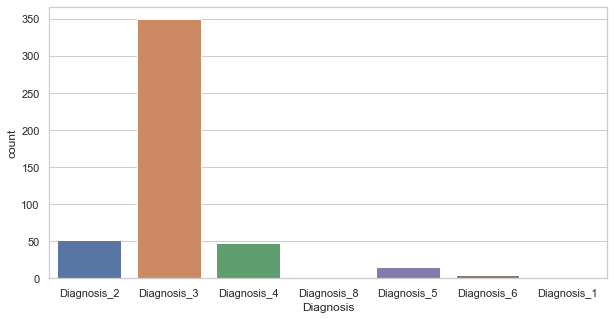

In [132]:
plt.figure(figsize=(10,5))
sns.countplot(x='Diagnosis',data=surgery)

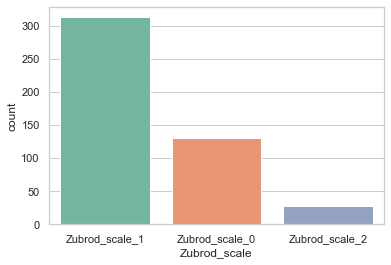

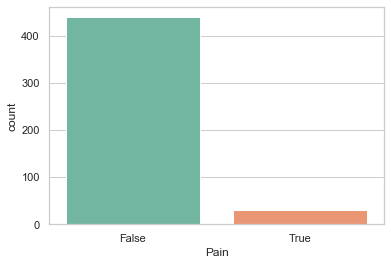

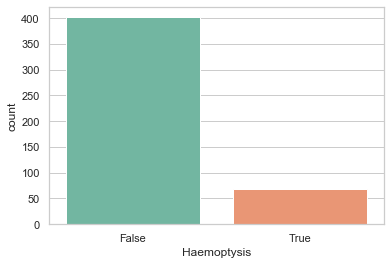

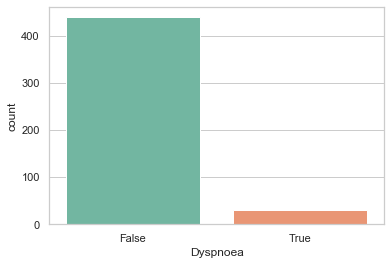

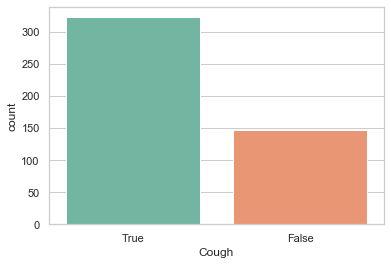

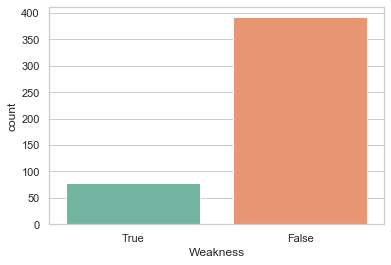

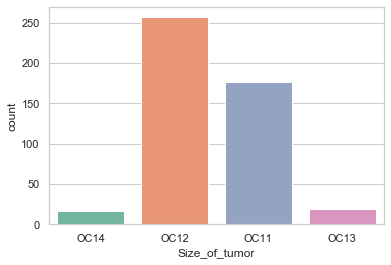

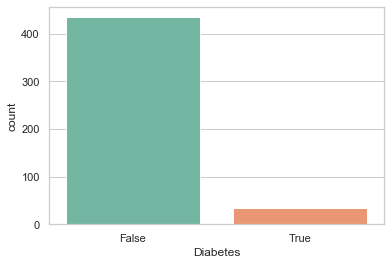

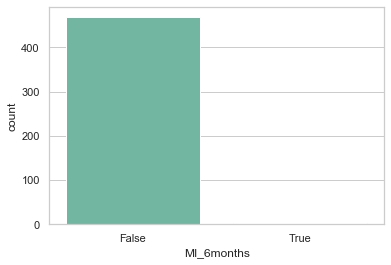

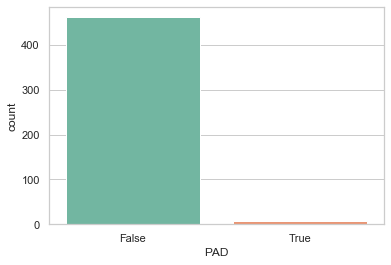

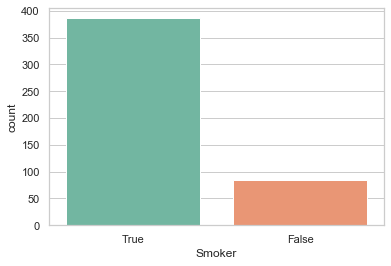

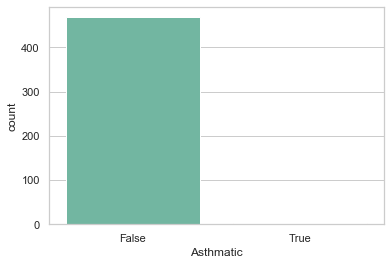

In [153]:
sns.set(style="whitegrid")
for i,cat in enumerate(cat_features[1:]):
    plt.figure(i)
    sns.countplot(x=cat,data=surgery,palette="Set2")

### Distribution of Continuous Feature. 

In [134]:
cont_features=['Forced_Capacity','Forced_Expiration','Age']

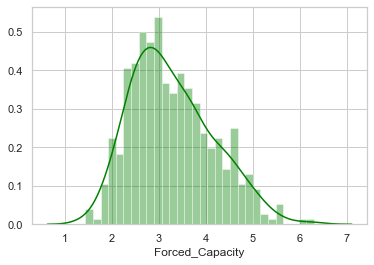

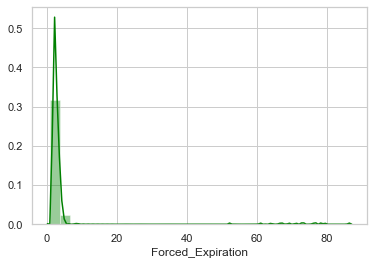

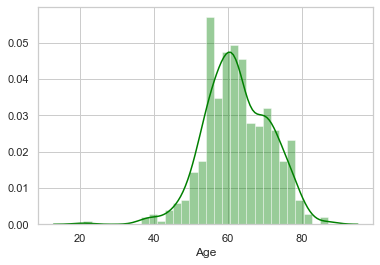

In [159]:
sns.set(style="whitegrid")
for i,cont in enumerate(cont_features):
    plt.figure(i)
    sns.distplot(surgery[cont],hist=True,bins=30,color="green")

### Relationship between Continuous features

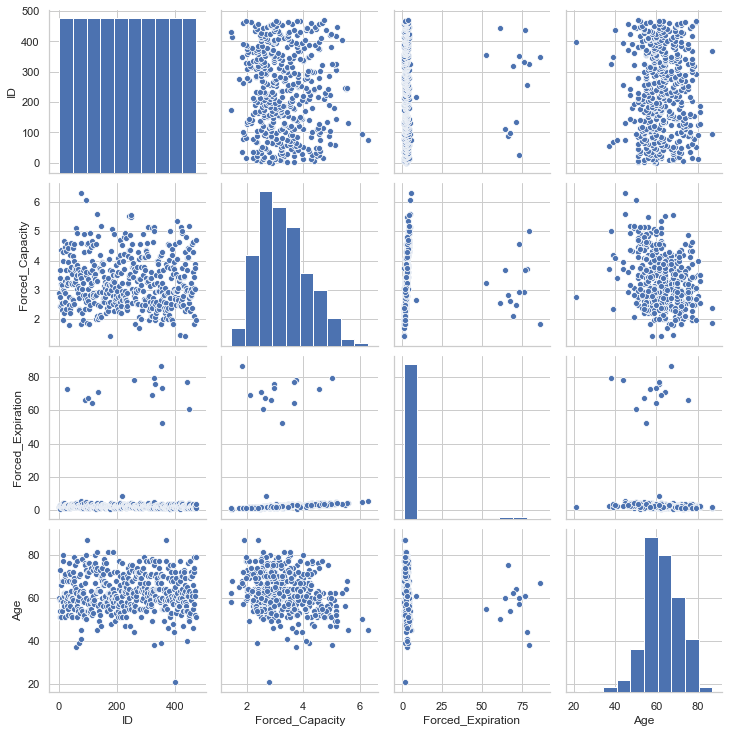

In [171]:
sns.pairplot(surgery)

#### Box Plot to detect outliers in continuous features

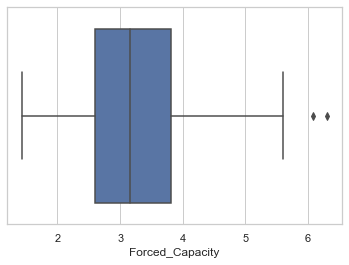

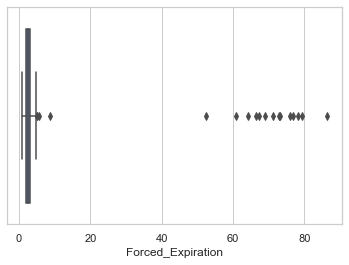

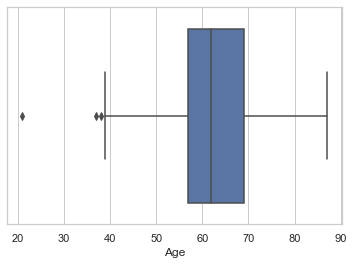

In [136]:

for i,cont in enumerate(cont_features):
    plt.figure(i)
    ax=sns.boxplot(x=cont,data=surgery)
    ax.plot

**Above Box plots depict there are outliers in all 3 continuous features. We can use different techniques to handle outliers.**

- Clamp Transformation can be used and check can be placed if it does not impact overall distribution.
- We can use standard Normalization of data betwen -1 and 1
- Binning

We can select the best approach after checking the impact on distribution after applying above 3 techniques.

## Distrbution of target feature

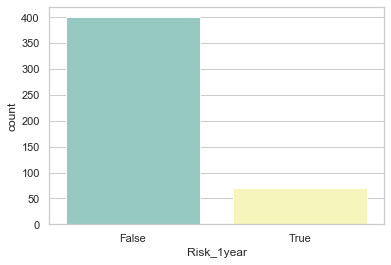

In [166]:
sns.countplot(x='Risk_1year',data=surgery,palette="Set3")

### There is huge gap in distribution of two levels in target feature. We can use "Over Sampling" Techniques to generate synthetic data for "True" Minority class.